In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [13]:
backlog_size = 72

In [14]:
pb_montecarlo_loops = 100000

In [15]:
poker_planning_values = [1,2,3,5,8,13,21]
pb_montecarlo_simulation = []

for pb_montecarlo_loop in range(pb_montecarlo_loops) :
    sum = 0
    for item in range(backlog_size) :
        random_index = random.randrange(len(poker_planning_values)-1)
        sum = sum + poker_planning_values[random_index]
    pb_montecarlo_simulation.append(sum)

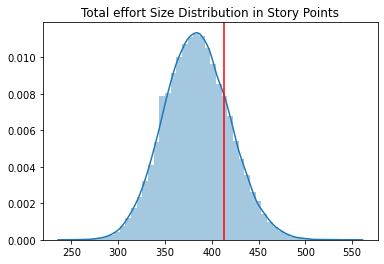

In [16]:
plt.subplot(1,1,1)
sns.distplot(pb_montecarlo_simulation)
backlog_size = np.percentile(pb_montecarlo_simulation, 80)
plt.title("Total effort Size Distribution in Story Points")
plt.axvline(x = backlog_size, color = 'red')
plt.show()

In [17]:
print(backlog_size)

413.0


In [18]:
pd.Series(pb_montecarlo_simulation).describe()

count    100000.000000
mean        384.123010
std          34.803109
min         247.000000
25%         360.000000
50%         384.000000
75%         407.000000
max         550.000000
dtype: float64

In [19]:
velocity ={'worst':29, 'best':37}
sprint_length = 10 
s_montecarlo_loops = pb_montecarlo_loops

To calculate the possible date of completion the following formula is used:<br>
$Time = (\frac{Story Points_{Total}}{Velocity_{Average}})*Sprint Length$

In [22]:
completion = []
finishes = []
for i in range (s_montecarlo_loops):
    sprints_to_finish = 0
    finish = backlog_size
    current_velocity = 0
    while (finish>0):
        current_velocity = random.randint(velocity['worst'], velocity['best'])
        finish = finish - current_velocity
        sprints_to_finish = sprints_to_finish + 1
    #The idea is that if your finish value is negative you only used a fraction of the
    #Sprint
    #if (finish < 0) : 
    #    completion.append(sprints_to_finish+(current_velocity + finish)/current_velocity)
    #else :
    completion.append(sprints_to_finish)

/Users/nicola/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


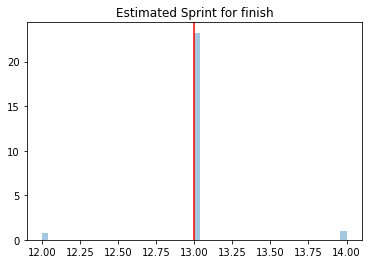

In [23]:
plt.subplot(1,1,1)
sns.distplot(completion)
value = np.percentile(completion, 80)
plt.title("Estimated Sprint for finish")
plt.axvline(x = value, color = 'red')
plt.show()

In [24]:
pd.Series(completion).describe()

count    100000.000000
mean         13.006400
std           0.265028
min          12.000000
25%          13.000000
50%          13.000000
75%          13.000000
max          14.000000
dtype: float64